In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/default of credit card clients.xls', header=1)

# Rename target for ease
df.rename(columns={'default payment next month': 'default'}, inplace=True)

# Preview
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [5]:
# Select the correct features manually
features = ['LIMIT_BAL',
            'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
            'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
            'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Split features and target
X = df[features]
y = df['default']


In [6]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Train all models
log_model = LogisticRegression(max_iter=1000, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
models = {
    "Logistic Regression": log_model,
    "Decision Tree": tree_model,
    "Random Forest": forest_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n🔍 {name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))



🔍 Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.23      0.34      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Confusion Matrix:
 [[4562  125]
 [1016  297]]
ROC-AUC: 0.7264215926114119

🔍 Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4687
           1       0.38      0.40      0.39      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000

Confusion Matrix:
 [[3827  860]
 [ 784  529]]
ROC-AUC: 0.6190975476074138

🔍 Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4

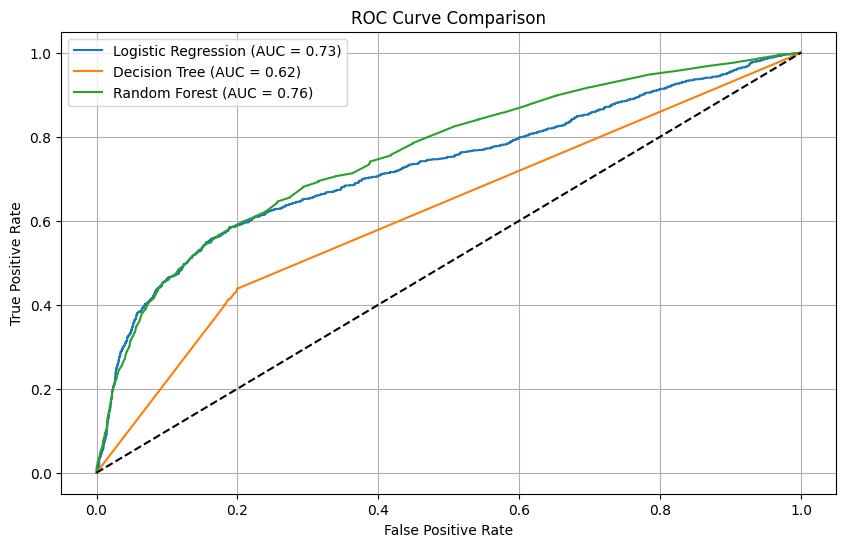

In [9]:
plt.figure(figsize=(10,6))
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
